In [132]:
import pandas as pd

In [133]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 1. Data Exploration 

## Data dictionary

- **survival**	Survival	0 = No, 1 = Yes
- **pclass**	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- **sex**	Sex	
- **Age**	Age in years	
- **sibsp**	# of siblings / spouses aboard the Titanic	
- **parch**	# of parents / children aboard the Titanic	
- **ticket**	Ticket number	
- **fare**	Passenger fare	
- **cabin**	Cabin number	
- **embarked**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S =  Southampton

In [134]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [136]:
train.shape

(891, 12)

In [137]:
test.shape

(418, 11)

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [140]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Visualising proportions in the data

In [142]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
def plot_prop(feature, data):
    survived = data[data['Survived'] == 1][feature].value_counts()
    dead = data[data['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

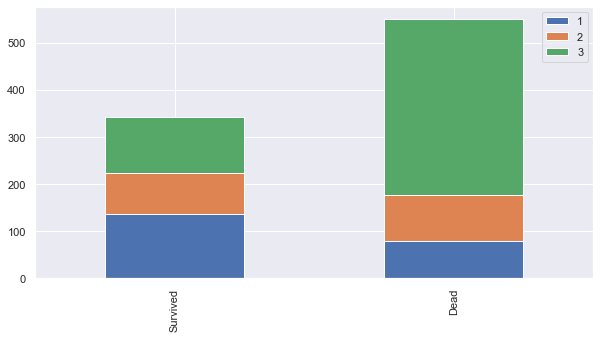

In [169]:
plot_prop('Pclass', train)

**1st class** passengers were more likely to survive, 
**3rd class** passengers were more likely to die

In [170]:
plot_prop('Sex', train)

TypeError: no numeric data to plot

**Women** were more likely to survive than **Men**

In [146]:
# plot_prop('Age') --> This feature needs additional preparation

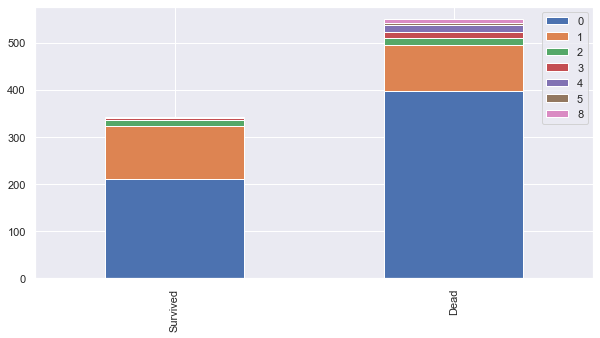

In [171]:
plot_prop('SibSp', train)

Passengers traveling **alone** were more likely to die

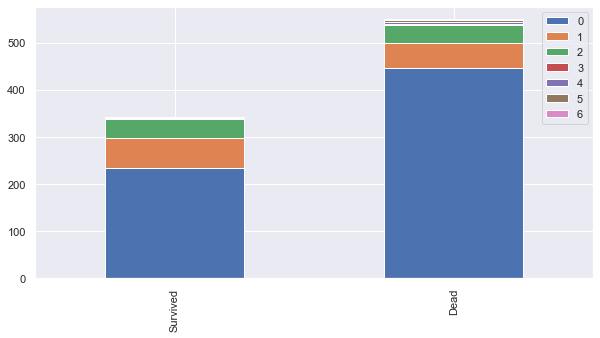

In [172]:
plot_prop('Parch', train)

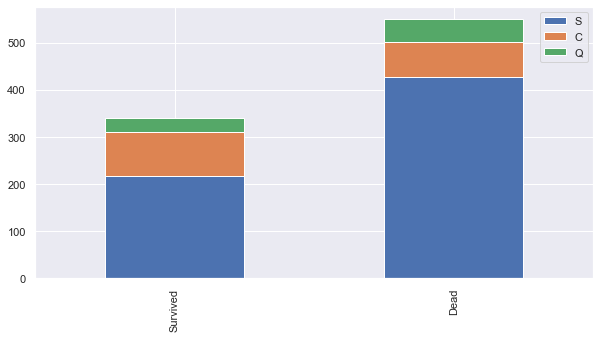

In [173]:
plot_prop('Embarked', train)

# 2. Featrue Engineering  #

## 2.1 Name

In [175]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

KeyError: 'Name'

In [176]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [177]:
test['Title'].value_counts()

0    240
1     78
2     72
3     28
Name: Title, dtype: int64

In [178]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [179]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,NaN,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,NaN,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,NaN,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,NaN,35.0,0,0,373450,8.0500,NaN,S,NaN


In [180]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,NaN,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,NaN,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,NaN,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,NaN,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,NaN,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [183]:
plot_prop('Title', train_test_data)

TypeError: list indices must be integers or slices, not str

In [182]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

KeyError: "['Name'] not found in axis"

In [158]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [159]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## 2.2 Sex

In [166]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [167]:
train_test_data['Sex']

TypeError: list indices must be integers or slices, not str

## 2.3 Age

In [92]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [93]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

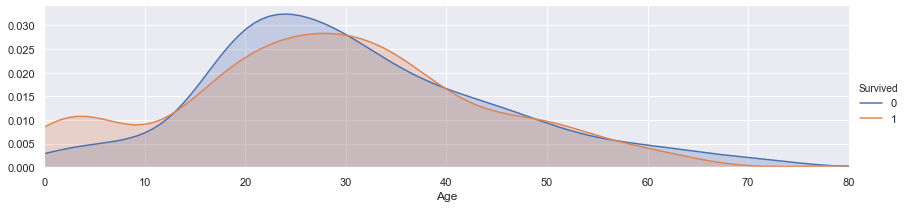

In [131]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()